Project 3: Complete Statistical Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore, ttest_1samp


In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [3]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000            

In [4]:
z_scores = np.abs(zscore(df.drop('target', axis=1)))
outliers = np.where(z_scores > 3)
print(f"\nNumber of Outliers Detected: {len(outliers[0])}")



Number of Outliers Detected: 211


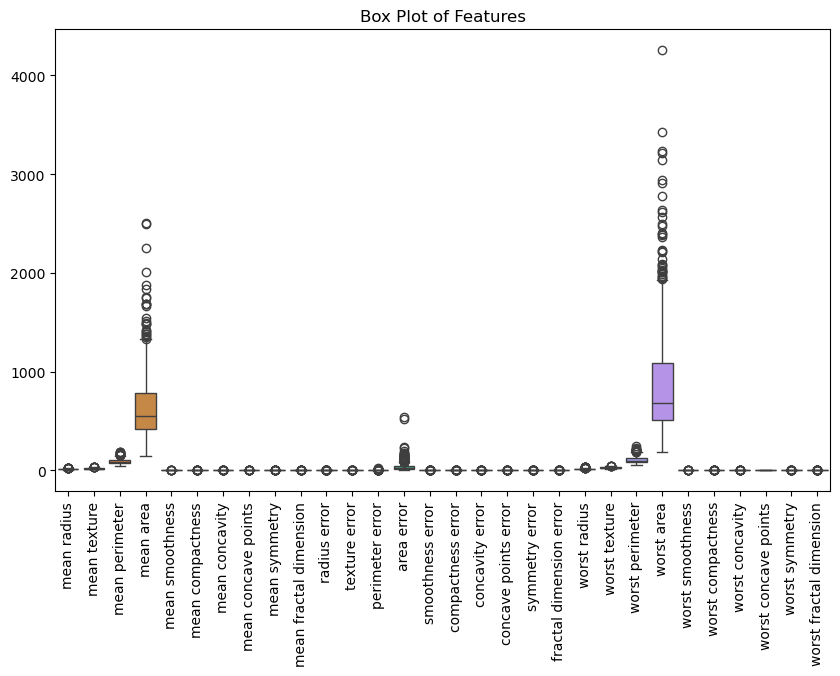

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop('target', axis=1))
plt.title("Box Plot of Features")
plt.xticks(rotation=90)
plt.show()

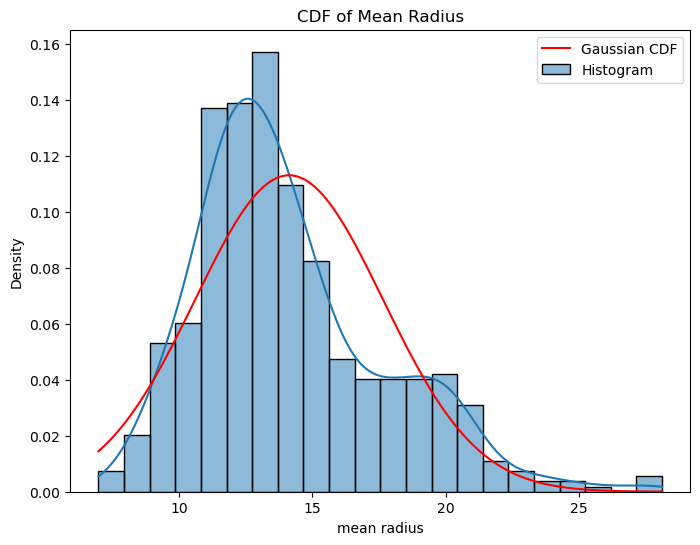

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['mean radius'], kde=True, stat="density", label="Histogram")
x = np.linspace(df['mean radius'].min(), df['mean radius'].max(), 100)
plt.plot(x, norm.pdf(x, df['mean radius'].mean(), df['mean radius'].std()), label="Gaussian CDF", color='red')
plt.legend()
plt.title("CDF of Mean Radius")
plt.show()

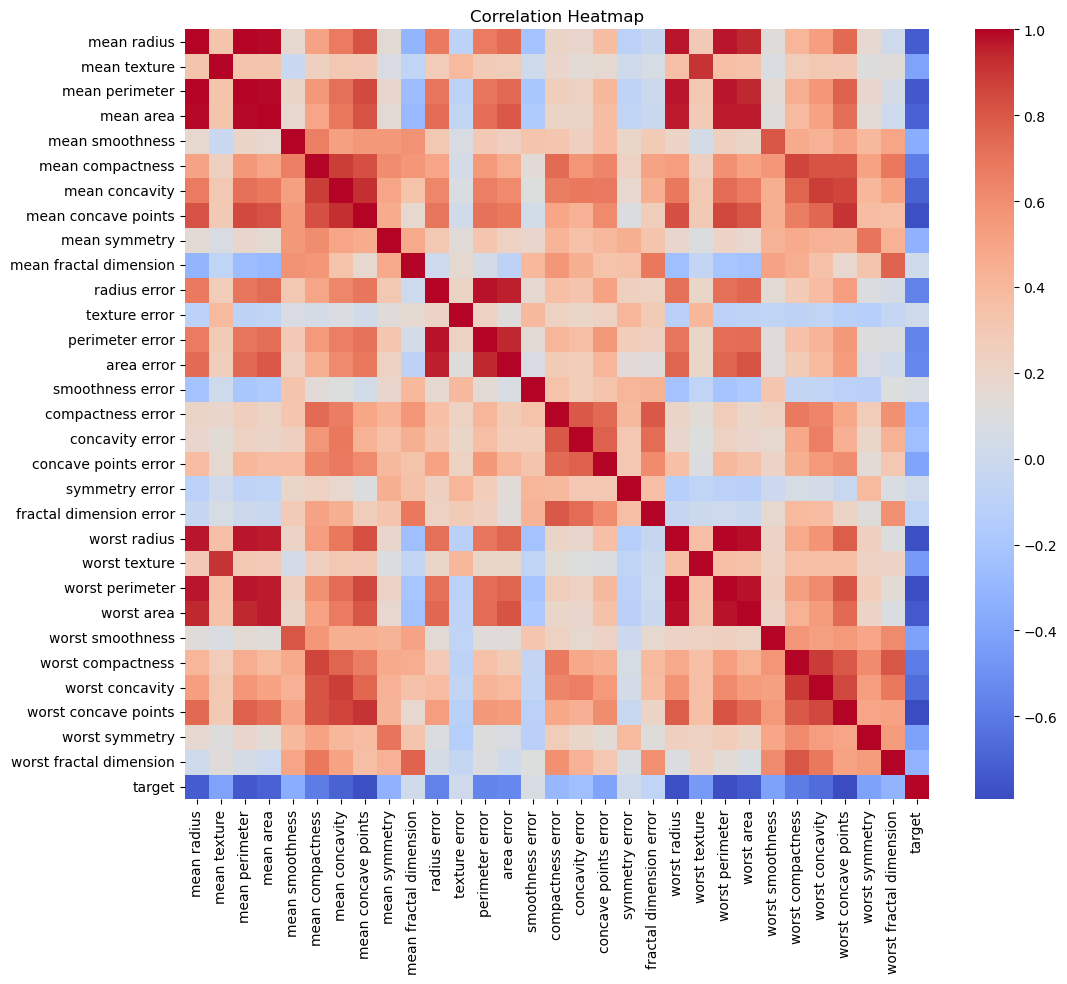

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
print("\nCovariance Matrix:\n", df.cov())


Covariance Matrix:
                          mean radius  mean texture  mean perimeter  \
mean radius                12.418920      4.907582       85.447142   
mean texture                4.907582     18.498909       34.439759   
mean perimeter             85.447142     34.439759      590.440480   
mean area                1224.483409    485.993787     8435.772345   
mean smoothness             0.008454     -0.001415        0.070836   
mean compactness            0.094197      0.053767        0.714714   
mean concavity              0.190128      0.103692        1.387234   
mean concave points         0.112475      0.048977        0.802360   
mean symmetry               0.014273      0.008419        0.121922   
mean fractal dimension     -0.007754     -0.002321       -0.044859   
radius error                0.663650      0.329037        4.661401   
texture error              -0.189189      0.916695       -1.162988   
perimeter error             4.803550      2.449449       34.053028   

In [9]:
print("\nPearson Correlation (mean radius vs mean texture):", df['mean radius'].corr(df['mean texture']))



Pearson Correlation (mean radius vs mean texture): 0.323781890927733


In [10]:
t_stat, p_value = ttest_1samp(df['mean radius'], 14)
print(f"\nT-Test Results - T-Statistic: {t_stat}, P-Value: {p_value}")



T-Test Results - T-Statistic: 0.8616173566232037, P-Value: 0.3892617071079777


In [11]:
df['z_score_radius'] = zscore(df['mean radius'])
print("\nSample Z-Scores:\n", df[['mean radius', 'z_score_radius']].head())



Sample Z-Scores:
    mean radius  z_score_radius
0        17.99        1.097064
1        20.57        1.829821
2        19.69        1.579888
3        11.42       -0.768909
4        20.29        1.750297


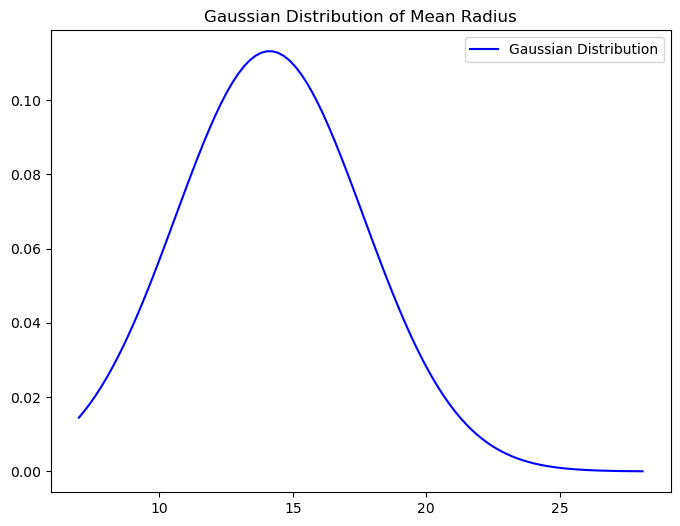

In [12]:
plt.figure(figsize=(8, 6))
x = np.linspace(df['mean radius'].min(), df['mean radius'].max(), 100)
plt.plot(x, norm.pdf(x, df['mean radius'].mean(), df['mean radius'].std()), label="Gaussian Distribution", color='blue')
plt.legend()
plt.title("Gaussian Distribution of Mean Radius")
plt.show()

In [13]:
t_stat, p_value = ttest_1samp(df['mean radius'], 14)
print(f"\nT-Test Results - T-Statistic: {t_stat}, P-Value: {p_value}")



T-Test Results - T-Statistic: 0.8616173566232037, P-Value: 0.3892617071079777
